There are a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 data points (audio files) in total.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import os
import librosa
import glob
import IPython.display as ipd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data Gathering

In [2]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 428M/428M [00:04<00:00, 120MB/s]
100% 428M/428M [00:04<00:00, 102MB/s]


In [3]:
!unzip '/content/toronto-emotional-speech-set-tess.zip'

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [4]:
emotions = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Surprise', 'Sad', 'Neutral']
print(os.listdir('/content/TESS Toronto emotional speech set data'))

['YAF_sad', 'YAF_happy', 'OAF_Fear', 'OAF_Sad', 'YAF_neutral', 'OAF_neutral', 'YAF_disgust', 'YAF_pleasant_surprised', 'OAF_angry', 'OAF_happy', 'OAF_Pleasant_surprise', 'YAF_angry', 'OAF_disgust', 'YAF_fear']


### Data Preprocessing

In [5]:
import os
import shutil

# Mapping between old folder names and new emotions
emotion_mapping = {
    'OAF_disgust': 'Disgust',
    'YAF_sad': 'Sad',
    'YAF_pleasant_surprised': 'Surprise',
    'OAF_Sad': 'Sad',
    'OAF_Fear': 'Fear',
    'YAF_happy': 'Happiness',
    'YAF_neutral': 'Neutral',
    'YAF_fear': 'Fear',
    'OAF_neutral': 'Neutral',
    'YAF_disgust': 'Disgust',
    'YAF_angry': 'Anger',
    'OAF_happy': 'Happiness',
    'OAF_Pleasant_surprise': 'Surprise',
    'OAF_angry': 'Anger'
}

# Function to rename folders and create new folders
def rename_folders_and_create_new_folders(root_dir):
    for old_folder_name, emotion in emotion_mapping.items():
        old_folder_path = os.path.join(root_dir, old_folder_name)
        if os.path.exists(old_folder_path):
            new_folder_path = os.path.join(root_dir, emotion)
            # Handle destination directory not empty error
            if os.path.exists(new_folder_path):
                # Merge contents of source directory into destination directory
                for item in os.listdir(old_folder_path):
                    shutil.move(os.path.join(old_folder_path, item), new_folder_path)
                # Remove source directory
                os.rmdir(old_folder_path)
            else:
                os.rename(old_folder_path, new_folder_path)
                print(f"Renamed '{old_folder_name}' to '{emotion}'")

            # Print only if new folder is created
            if not os.path.exists(new_folder_path):
                os.makedirs(new_folder_path)
                print(f"Created new folder for '{emotion}'")
        else:
            print(f"Folder '{old_folder_name}' does not exist.")

# Example usage
root_directory = "/content/TESS Toronto emotional speech set data"
rename_folders_and_create_new_folders(root_directory)

Renamed 'OAF_disgust' to 'Disgust'
Renamed 'YAF_sad' to 'Sad'
Renamed 'YAF_pleasant_surprised' to 'Surprise'
Renamed 'OAF_Fear' to 'Fear'
Renamed 'YAF_happy' to 'Happiness'
Renamed 'YAF_neutral' to 'Neutral'
Renamed 'YAF_angry' to 'Anger'


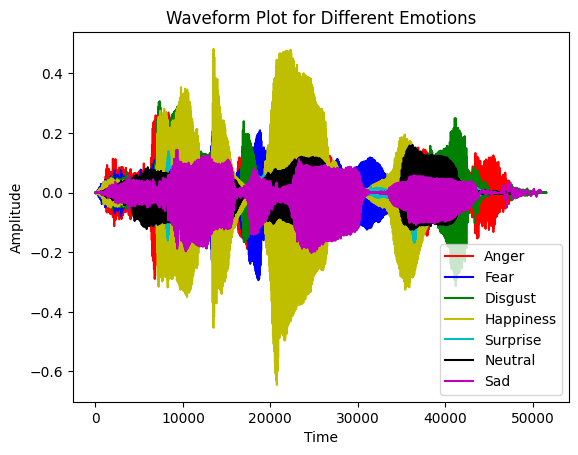

In [6]:
root_dir = '/content/TESS Toronto emotional speech set data'

emotion_colors = {
    'Anger': 'r',      # Red color for Anger
    'Disgust': 'g',    # Green color for Disgust
    'Fear': 'b',       # Blue color for Fear
    'Happiness': 'y',  # Yellow color for Happiness
    'Surprise': 'c',   # Cyan color for Surprise
    'Sad': 'm',        # Magenta color for Sad
    'Neutral': 'k'     # Black color for Neutral
}

for folder in os.listdir(root_dir):
  emotion = folder
  foldername = os.path.join(root_dir,folder)
  for file in os.listdir(foldername):
    filename = os.path.join(foldername,file)
    data, sampling_rate = librosa.load(filename)
    color = emotion_colors.get(emotion, 'k')
    plt.plot(data,color=color,label=emotion)
    break

plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform Plot for Different Emotions')
plt.show()

### Exploratory Data Analysis (EDA)

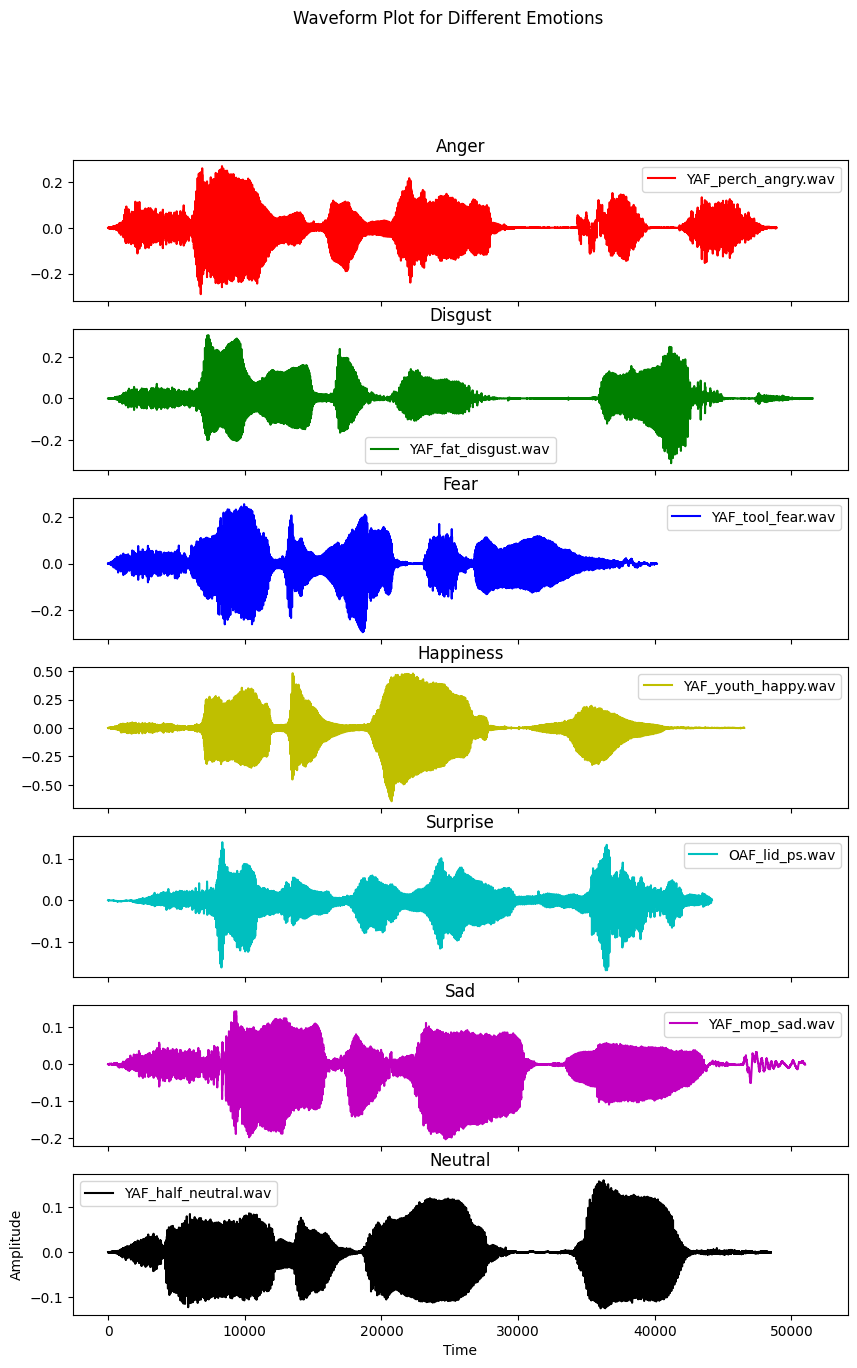

In [7]:
root_dir = '/content/TESS Toronto emotional speech set data'

# Define colors or markers for each emotion
emotion_colors = {
    'Anger': 'r',      # Red color for Anger
    'Disgust': 'g',    # Green color for Disgust
    'Fear': 'b',       # Blue color for Fear
    'Happiness': 'y',  # Yellow color for Happiness
    'Surprise': 'c',   # Cyan color for Surprise
    'Sad': 'm',        # Magenta color for Sad
    'Neutral': 'k'     # Black color for Neutral
}

# Create a subplot for each emotion
fig, axs = plt.subplots(len(emotion_colors), 1, figsize=(10, 15), sharex=True)

for i, (emotion, color) in enumerate(emotion_colors.items()):
    axs[i].set_title(emotion)

    folder_path = os.path.join(root_dir, emotion)

    for file in os.listdir(folder_path):
        filename = os.path.join(folder_path, file)
        data, sampling_rate = librosa.load(filename)
        axs[i].plot(data, color=color, label=file)
        axs[i].legend()
        break

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.suptitle('Waveform Plot for Different Emotions')
plt.show()

From this observation, it can be concluded that waveforms associated with the emotion of anger exhibit pronounced peaks, indicating high amplitude, whereas those related to sadness and fear display comparatively subdued patterns, characterized by lower amplitudes.

### Feature Extraction

In [8]:
import soundfile as sf

def extract_features(root_dir):
    features = []
    labels = []

    for folder in os.listdir(root_dir):
        emotion = folder
        foldername = os.path.join(root_dir, folder)

        for file in os.listdir(foldername):
            filename = os.path.join(foldername, file)
            audio, sample_rate = sf.read(filename)
            mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
            mfccs_processed = np.mean(mfccs.T, axis=0)

            features.append(mfccs_processed)
            labels.append(emotion)

    return features, labels

root_dir = '/content/TESS Toronto emotional speech set data'
features, labels = extract_features(root_dir)

# Create a DataFrame to store the features and labels
data = pd.DataFrame({'Feature': features, 'Label': labels})

In [9]:
# view of Dataframe
data.head()

,Feature,Label
0,"[-358.4745238554878, 27.84338247967522, -1.617...",Anger
1,"[-436.4693649919907, 71.83358560923607, 10.949...",Anger
2,"[-366.94271238967843, 5.49794389105641, -1.220...",Anger
3,"[-397.7730868104715, 31.884531197550192, -3.29...",Anger
4,"[-248.91310563975418, 32.610278883113, -28.673...",Anger


In [10]:
# Shape of Data
data.shape

(2800, 2)

In [11]:
# Count of Different Labels
data['Label'].value_counts()

Label
Anger        400
Fear         400
Disgust      400
Happiness    400
Surprise     400
Neutral      400
Sad          400
Name: count, dtype: int64

In [12]:
X = data['Feature']
y = data['Label']

In [13]:
print(X.shape)
print(y.shape)

(2800,)
(2800,)


### Model Training

In [14]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le = LabelEncoder()
y = to_categorical(le.fit_transform(y))

In [15]:
X

0       [-358.4745238554878, 27.84338247967522, -1.617...
1       [-436.4693649919907, 71.83358560923607, 10.949...
2       [-366.94271238967843, 5.49794389105641, -1.220...
3       [-397.7730868104715, 31.884531197550192, -3.29...
4       [-248.91310563975418, 32.610278883113, -28.673...
                              ...                        
2795    [-524.2501221199275, 67.6792287844435, 28.6518...
2796    [-553.7715220785998, 89.56611103283439, 30.647...
2797    [-527.8186719825314, 76.57834391971085, 32.293...
2798    [-520.776160719277, 88.65824520854429, 32.9718...
2799    [-402.1984123244056, 74.01376083589601, 27.440...
Name: Feature, Length: 2800, dtype: object

In [16]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
X = np.array([np.array(feat) for feat in X])
X

array([[-3.58474524e+02,  2.78433825e+01, -1.61729669e+00, ...,
         4.70312809e+00,  2.99279457e+00,  1.00582215e+00],
       [-4.36469365e+02,  7.18335856e+01,  1.09495034e+01, ...,
        -2.73721043e-01,  3.02932071e+00,  5.04754188e-01],
       [-3.66942712e+02,  5.49794389e+00, -1.22080413e+00, ...,
        -2.26013763e+00, -2.42845074e+00, -3.05409789e+00],
       ...,
       [-5.27818672e+02,  7.65783439e+01,  3.22937073e+01, ...,
         6.06940696e+00,  1.06354584e+01,  1.15242092e+01],
       [-5.20776161e+02,  8.86582452e+01,  3.29718469e+01, ...,
         6.09329907e+00,  1.05104675e+01,  1.31166788e+01],
       [-4.02198412e+02,  7.40137608e+01,  2.74401946e+01, ...,
         4.03678633e+00,  2.03762611e+00,  8.77143383e+00]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [19]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()

# Input shape should be the number of features in each sample
input_shape = X_train.shape[1]

model.add(Dense(256, input_shape=(input_shape,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(len(le.classes_)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
70/70 [==============================] - 4s 6ms/step - loss: 8.8224 - accuracy: 0.2067 - val_loss: 1.7055 - val_accuracy: 0.4107
Epoch 2/20
70/70 [==============================] - 0s 4ms/step - loss: 2.0977 - accuracy: 0.2920 - val_loss: 1.6212 - val_accuracy: 0.4598
Epoch 3/20
70/70 [==============================] - 0s 4ms/step - loss: 1.5768 - accuracy: 0.4058 - val_loss: 1.1833 - val_accuracy: 0.5134
Epoch 4/20
70/70 [==============================] - 0s 4ms/step - loss: 1.2699 - accuracy: 0.5129 - val_loss: 0.7700 - val_accuracy: 0.7009
Epoch 5/20
70/70 [==============================] - 0s 4ms/step - loss: 0.9732 - accuracy: 0.6250 - val_loss: 0.5360 - val_accuracy: 0.8170
Epoch 6/20
70/70 [==============================] - 0s 4ms/step - loss: 0.7231 - accuracy: 0.7205 - val_loss: 0.3775 - val_accuracy: 0.8839
Epoch 7/20
70/70 [==============================] - 0s 4ms/step - loss: 0.5674 - accuracy: 0.7768 - val_loss: 0.2528 - val_accuracy: 0.9420
Epoch 8/20
70/70 [==

In [20]:
loss, accuracy = model.evaluate(X_test,y_test)
print("Test Loss: ",loss)
print("Test Accuracy: ",accuracy)

18/18 [==============================] - 0s 5ms/step - loss: 0.0209 - accuracy: 0.9946
Test Loss:  0.0209377259016037
Test Accuracy:  0.9946428537368774


### Predictions

18/18 [==============================] - 0s 2ms/step


<Axes: >

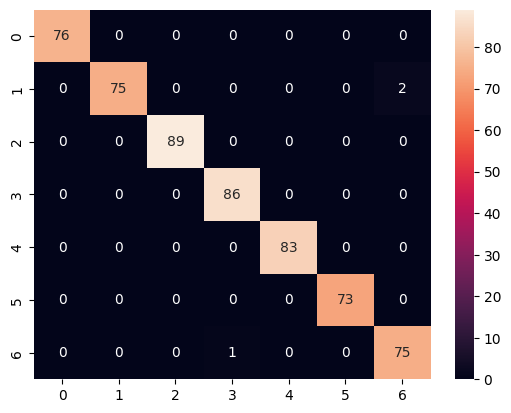

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(conf_matrix,annot=True)

### Saving the Model

In [23]:
model.export('Speech_Emotion_Model')

Saved artifact at 'Speech_Emotion_Model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 40), dtype=tf.float32, name='dense_input')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  136592248770576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136592248767760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136592248834704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136592248777968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136592248838224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136592248833648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136592248841392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136592248835584: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [26]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r /content/Speech_Emotion_Model /content/drive/MyDrive/